In [2]:
import sqlite3

# Ruta al archivo .db
ruta_db = 'db_a.db'

# Conexión a la base de datos
conexion = sqlite3.connect(ruta_db)

# Crear un cursor para ejecutar comandos SQL
cursor = conexion.cursor()

# Ejemplo: Mostrar todas las tablas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tablas = cursor.fetchall()

print("Tablas en la base de datos:")
for tabla in tablas:
    print(tabla[0], tabla)
    cols = cursor.execute(f"PRAGMA table_info('{tabla[0]}')").fetchall()
    print("Columnas", cols, "\n")

# No olvides cerrar la conexión cuando termines
#conexion.close()

Tablas en la base de datos:
Tiempos produccion ('Tiempos produccion',)
Columnas [(0, 'Producto', 'TEXT', 0, None, 0), (1, 'elaboracion', 'INTEGER', 0, None, 0), (2, 'fraccionamiento', 'INTEGER', 0, None, 0), (3, 'acondicionado', 'INTEGER', 0, None, 0)] 

Tiempos control de calidad ('Tiempos control de calidad',)
Columnas [(0, 'Producto', 'TEXT', 0, None, 0), (1, 'qa_elaboracion', 'INTEGER', 0, None, 0), (2, 'qa_fraccionamiento', 'INTEGER', 0, None, 0), (3, 'qa_acondicionado', 'INTEGER', 0, None, 0)] 

Productos ('Productos',)
Columnas [(0, 'Producto', 'TEXT', 0, None, 0), (1, 'Descripcion', 'TEXT', 0, None, 0)] 

Pedidos ('Pedidos',)
Columnas [(0, 'Producto', 'TEXT', 0, None, 0), (1, 'Unidades', 'INTEGER', 0, None, 0), (2, 'Lote', 'TEXT', 0, None, 0)] 



In [3]:
conexion = sqlite3.connect(ruta_db)

max_lotes = 6 
query = f'SELECT * FROM Pedidos LIMIT {max_lotes}'
cursor = conexion.cursor()

cursor.execute(query)
rta = cursor.fetchall()
rta

[('IBU2', 5000, 'A'),
 ('IBU2', 1500, 'B'),
 ('PEN10', 1500, 'C'),
 ('IBU2', 5000, 'D'),
 ('AMO1', 2000, 'E'),
 ('IBU2', 1500, 'F')]

In [4]:
# Obtener los nombres de las columnas de la tabla 'Pedidos'
cursor.execute("PRAGMA table_info(Pedidos);")
columnas = cursor.fetchall()

print("Nombres de las columnas:")
for columna in columnas:
    print(columna[1])

Nombres de las columnas:
Producto
Unidades
Lote


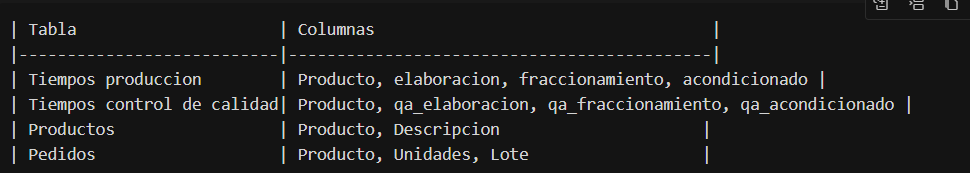

In [5]:
query_2 = """
 
    SELECT
        tp.producto as producto,
        tp.elaboracion as elab,
        tc.qa_elaboracion,
        tp.fraccionamiento as fraccionamiento,
        tc.qa_fraccionamiento,
        tp.acondicionado as acondicionado,
        tc.qa_acondicionado
    FROM
        'Tiempos produccion' as tp
    JOIN
        'Tiempos control de calidad' as tc
    ON
        tp.producto = tc.producto
"""

In [6]:
import pandas as pd

def run_query(query):
    conexion = sqlite3.connect(ruta_db)
    cursor = conexion.cursor()

    cursor.execute(query)
    # Obtener los nombres de las columnas
    columnas = [descripcion[0] for descripcion in cursor.description]

    # Convertir el resultado a un DataFrame
    resultados = cursor.fetchall()
    df = pd.DataFrame(resultados, columns=columnas)
    conexion.close()
    return df

In [7]:
run_query(query_2)

,producto,elab,qa_elaboracion,fraccionamiento,qa_fraccionamiento,acondicionado,qa_acondicionado
0,IBU2,6,3,8,2,9,4
1,PEN10,7,2,10,5,7,2
2,AMO1,10,2,10,3,7,2


In [8]:
query_3 = """
    with temp_table as (
            SELECT
            tp.producto as producto,
            tp.elaboracion as elab,
            tc.qa_elaboracion,
            tp.fraccionamiento as fraccionamiento,
            tc.qa_fraccionamiento,
            tp.acondicionado as acondicionado,
            tc.qa_acondicionado
        FROM
            'Tiempos produccion' as tp
        JOIN
            'Tiempos control de calidad' as tc
        ON
            tp.producto = tc.producto
    ),
    ultimos_pedidos as (
        SELECT * FROM Pedidos LIMIT 6
    )
    SELECT p.lote, temp_table.*
    from ultimos_pedidos as p
    JOIN temp_table
    ON p.producto = temp_table.producto    
"""

In [9]:
datos = run_query(query_3)
datos

,Lote,producto,elab,qa_elaboracion,fraccionamiento,qa_fraccionamiento,acondicionado,qa_acondicionado
0,A,IBU2,6,3,8,2,9,4
1,B,IBU2,6,3,8,2,9,4
2,C,PEN10,7,2,10,5,7,2
3,D,IBU2,6,3,8,2,9,4
4,E,AMO1,10,2,10,3,7,2
5,F,IBU2,6,3,8,2,9,4


In [10]:
query_4 = """
    with temp_table as (
            SELECT
            tp.producto as producto,
            tp.elaboracion as elab,
            tc.qa_elaboracion,
            tp.fraccionamiento as fraccionamiento,
            tc.qa_fraccionamiento,
            tp.acondicionado as acondicionado,
            tc.qa_acondicionado
        FROM
            'Tiempos produccion' as tp
        JOIN
            'Tiempos control de calidad' as tc
        ON
            tp.producto = tc.producto
    ),
    ultimos_pedidos as (
        SELECT * FROM Pedidos LIMIT 6
    )
    SELECT p.lote,
        temp_table.elab * p.Unidades as total_elab,
        temp_table.qa_elaboracion * p.Unidades as total_qa_elab,
        temp_table.fraccionamiento * p.Unidades as total_fraccionamiento,
        temp_table.qa_fraccionamiento * p.Unidades as total_qa_fraccionamiento,
        temp_table.acondicionado * p.Unidades as total_acondicionado,
        temp_table.qa_acondicionado * p.Unidades as total_qa_acondicionado
    from ultimos_pedidos as p
    JOIN temp_table
    ON p.producto = temp_table.producto    
"""

In [ ]:
run_query(query_4)

,Lote,total_elab,total_qa_elab,total_fraccionamiento,total_qa_fraccionamiento,total_acondicionado,total_qa_acondicionado
0,A,30000,15000,40000,10000,45000,20000
1,B,9000,4500,12000,3000,13500,6000
2,C,10500,3000,15000,7500,10500,3000
3,D,30000,15000,40000,10000,45000,20000
4,E,20000,4000,20000,6000,14000,4000
5,F,9000,4500,12000,3000,13500,6000


In [32]:
datos

,Lote,producto,elab,qa_elaboracion,fraccionamiento,qa_fraccionamiento,acondicionado,qa_acondicionado
0,A,IBU2,6,3,8,2,9,4
1,B,IBU2,6,3,8,2,9,4
2,C,PEN10,7,2,10,5,7,2
3,D,IBU2,6,3,8,2,9,4
4,E,AMO1,10,2,10,3,7,2
5,F,IBU2,6,3,8,2,9,4


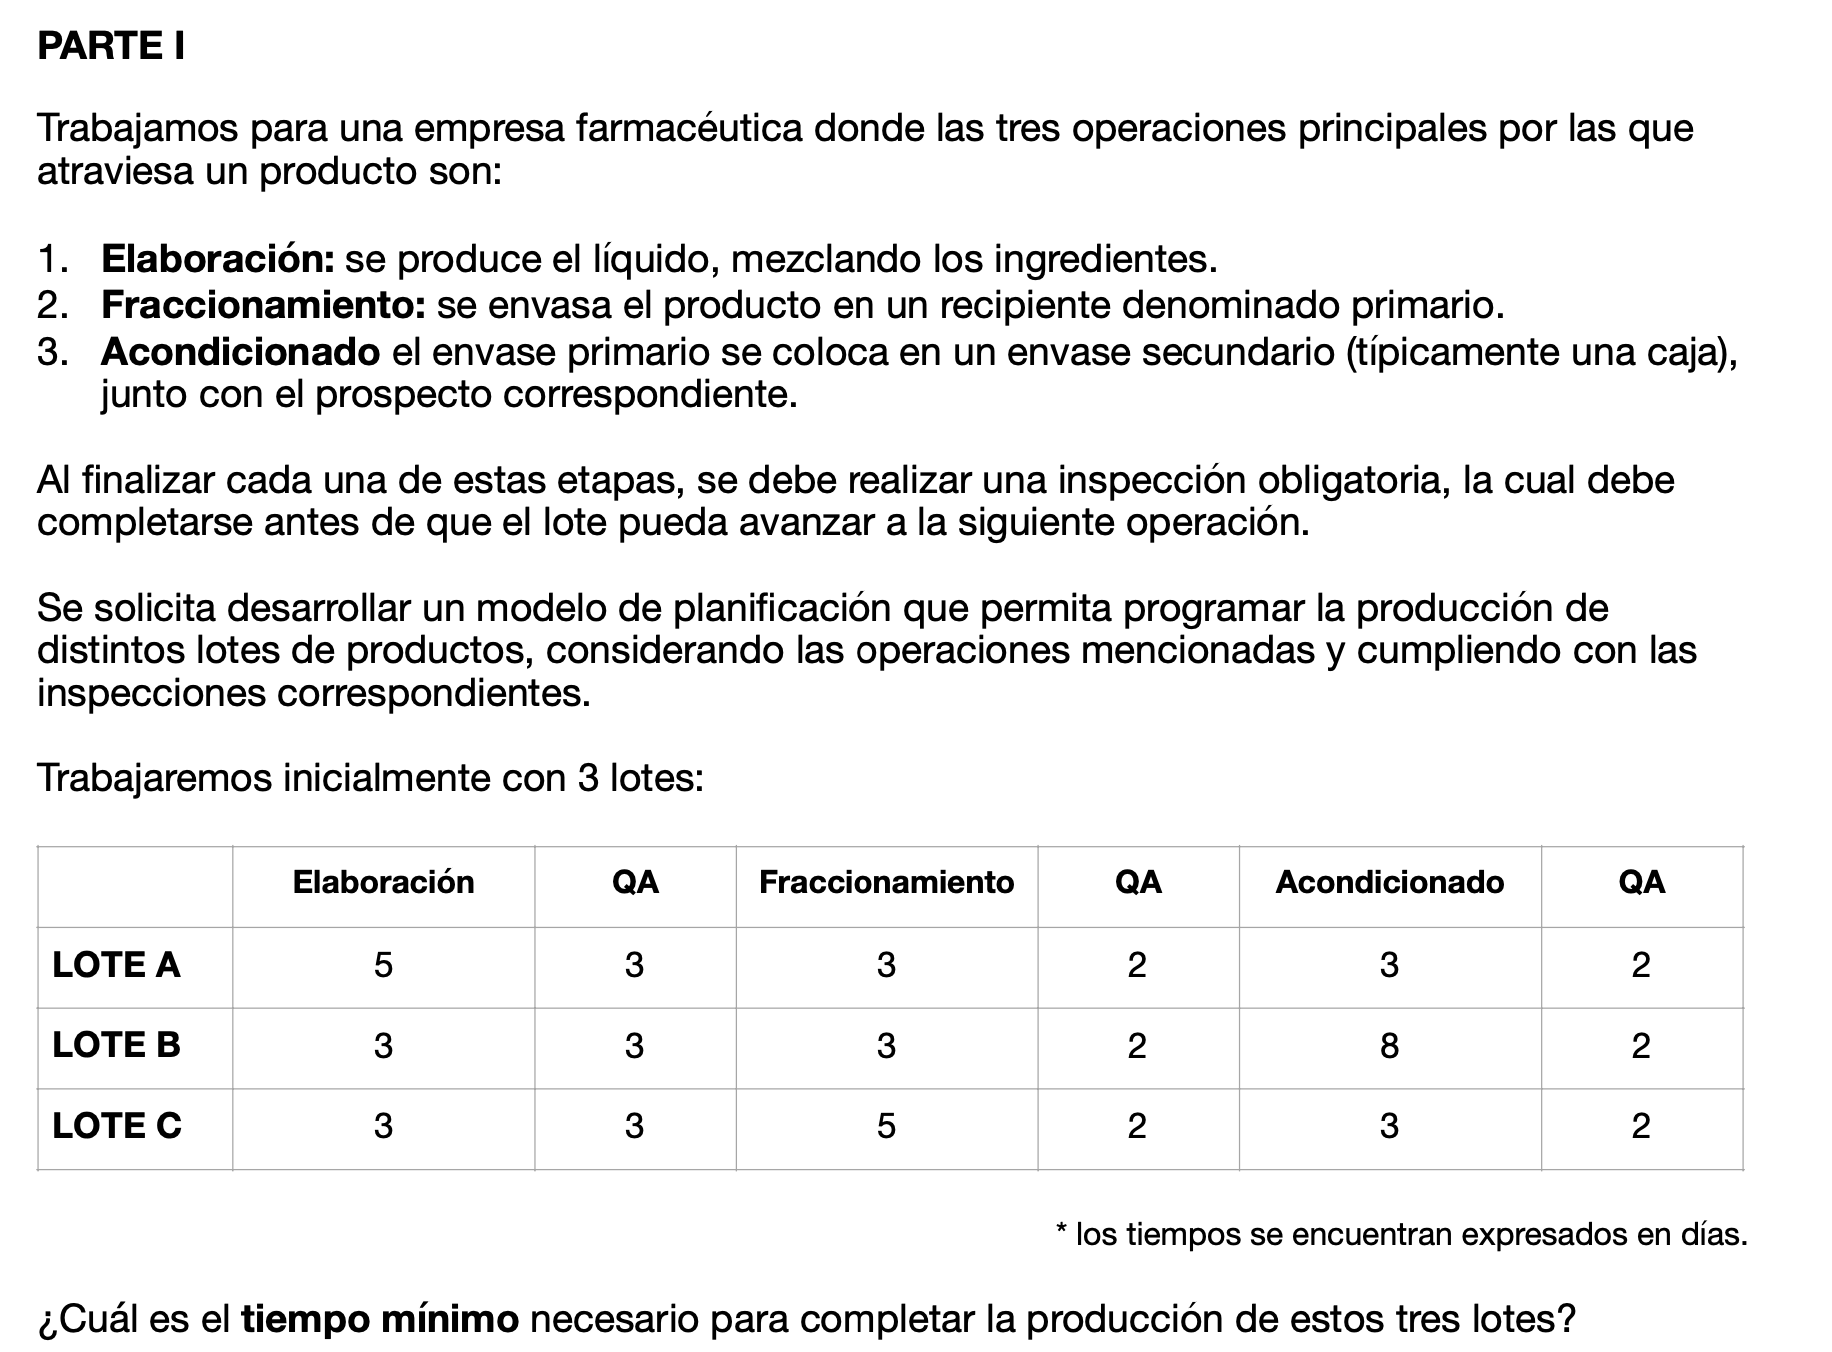

In [15]:
!pip install ortools

  Using cached protobuf-5.29.4-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 2.8 MB/s eta 0:00:00a 0:00:01
Using cached protobuf-5.29.4-cp38-abi3-macosx_10_9_universal2.whl (417 kB)


## Resolucion de la version anterior (estatica) del problema

In [27]:
OVERLAP = True

In [28]:
from ortools.sat.python import cp_model

# Crear el modelo
model = cp_model.CpModel()

# Datos del problema
lotes = ['A', 'B', 'C']
duraciones = {
    'elaboracion': [5, 3, 3],
    'qa_elaboracion': [3, 3, 3],
    'fraccionamiento': [3, 3, 5],
    'qa_fraccionamiento': [2, 2, 2],
    'acondicionado': [3, 8, 3],
    'qa_acondicionado': [2, 2, 2]
}

# Variables de inicio y fin para cada tarea
inicio = {}
fin = {}
for lote in lotes:
    for tarea in duraciones.keys():
        inicio[(lote, tarea)] = model.NewIntVar(0, 100, f'inicio_{lote}_{tarea}')
        fin[(lote, tarea)] = model.NewIntVar(0, 100, f'fin_{lote}_{tarea}')

# Restricciones de duración
for i, lote in enumerate(lotes):
    for tarea, duracion in duraciones.items():
        model.Add(fin[(lote, tarea)] == inicio[(lote, tarea)] + duracion[i])

# Restricciones de precedencia
for lote in lotes:
    model.Add(inicio[(lote, 'qa_elaboracion')] >= fin[(lote, 'elaboracion')])
    model.Add(inicio[(lote, 'fraccionamiento')] >= fin[(lote, 'qa_elaboracion')])
    model.Add(inicio[(lote, 'qa_fraccionamiento')] >= fin[(lote, 'fraccionamiento')])
    model.Add(inicio[(lote, 'acondicionado')] >= fin[(lote, 'qa_fraccionamiento')])
    model.Add(inicio[(lote, 'qa_acondicionado')] >= fin[(lote, 'acondicionado')])

# Restricción de no solapamiento entre lotes (máquina única por etapa)
if OVERLAP:
    for tarea in duraciones.keys():
        intervals = []
        for lote in lotes:
            intervals.append(model.NewIntervalVar(
                inicio[(lote, tarea)],
                duraciones[tarea][lotes.index(lote)],
                fin[(lote, tarea)],
                f'interval_{lote}_{tarea}'
            ))
        model.AddNoOverlap(intervals)

# Minimizar el tiempo total (makespan)
makespan = model.NewIntVar(0, 100, 'makespan')
model.AddMaxEquality(makespan, [fin[(lote, 'qa_acondicionado')] for lote in lotes])
model.Minimize(makespan)

# Resolver el modelo
solver = cp_model.CpSolver()
status = solver.Solve(model)

# Mostrar resultados
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    print(f'Tiempo mínimo necesario: {solver.ObjectiveValue()}')
    for lote in lotes:
        print(f'\nLote {lote}:')
        for tarea in duraciones.keys():
            print(f'  {tarea}: inicio={solver.Value(inicio[(lote, tarea)])}, fin={solver.Value(fin[(lote, tarea)])}')
else:
    print('No se encontró solución factible.')

Tiempo mínimo necesario: 27.0

Lote A:
  elaboracion: inicio=6, fin=11
  qa_elaboracion: inicio=11, fin=14
  fraccionamiento: inicio=14, fin=17
  qa_fraccionamiento: inicio=17, fin=19
  acondicionado: inicio=19, fin=22
  qa_acondicionado: inicio=22, fin=24

Lote B:
  elaboracion: inicio=0, fin=3
  qa_elaboracion: inicio=3, fin=6
  fraccionamiento: inicio=6, fin=9
  qa_fraccionamiento: inicio=9, fin=11
  acondicionado: inicio=11, fin=19
  qa_acondicionado: inicio=19, fin=21

Lote C:
  elaboracion: inicio=3, fin=6
  qa_elaboracion: inicio=6, fin=9
  fraccionamiento: inicio=9, fin=14
  qa_fraccionamiento: inicio=14, fin=16
  acondicionado: inicio=22, fin=25
  qa_acondicionado: inicio=25, fin=27


In [29]:
#!pip install matplotlib

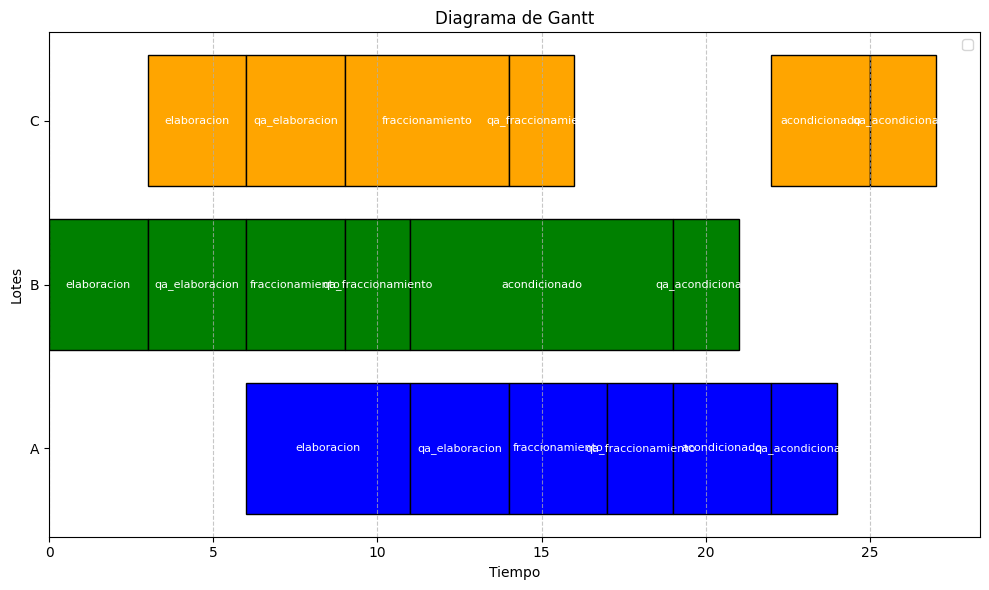

In [30]:
# Importar matplotlib para graficar
import matplotlib.pyplot as plt

# Crear el diagrama de Gantt
fig, ax = plt.subplots(figsize=(10, 6))

# Colores para los lotes
colores = {'A': 'blue', 'B': 'green', 'C': 'orange'}

# Agregar las tareas al gráfico
for lote in lotes:
    for tarea in duraciones.keys():
        inicio_tarea = solver.Value(inicio[(lote, tarea)])
        duracion_tarea = duraciones[tarea][lotes.index(lote)]
        # Dibujar la barra
        ax.barh(lote, duracion_tarea, left=inicio_tarea, color=colores[lote], edgecolor='black')
        # Agregar el nombre de la tarea como etiqueta
        ax.text(inicio_tarea + duracion_tarea / 2, lote, tarea, ha='center', va='center', color='white', fontsize=8)

# Configurar el gráfico
ax.set_xlabel('Tiempo')
ax.set_ylabel('Lotes')
ax.set_title('Diagrama de Gantt')
ax.set_yticks(range(len(lotes)))
ax.set_yticklabels(lotes)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# Evitar duplicados en la leyenda
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Version nueva, con integracion de variables de SQL

In [182]:
class Scheduler:
    def __init__(self, lotes: list, duraciones: dict, max_makespan = 100, no_overlap = True):
        # variables del problema
        self.lotes = lotes
        self.duraciones = duraciones
        self.max_makespan = max_makespan
        self.no_overlap = no_overlap

        # vars a completar cuando se instancie el modelo
        self.inicio = {}
        self.fin = {}
        self.model = cp_model.CpModel()
        self.solver = cp_model.CpSolver()

        # report
        print(f'Creando scheduler para {len(lotes)} lotes y {len(duraciones)} tareas.\nLotes {lotes} \nDuraciones {duraciones}')

    def create_restriccions(self):
        for lote in self.lotes:
            for tarea in self.duraciones.keys():
                self.inicio[(lote, tarea)] = self.model.NewIntVar(0, 100, f'inicio_{lote}_{tarea}')
                self.fin[(lote, tarea)] = self.model.NewIntVar(0, 100, f'fin_{lote}_{tarea}')

        # Restricciones de duración
        for i, lote in enumerate(self.lotes):
            for tarea, duracion in self.duraciones.items():
                self.model.Add(self.fin[(lote, tarea)] == self.inicio[(lote, tarea)] + duracion[i])

        # Restricciones de precedencia # TODO que esto sea dinamico y no dependa de los nombres
        for lote in self.lotes:
            self.model.Add(self.inicio[(lote, 'qa_elaboracion')] >= self.fin[(lote, 'elaboracion')])
            self.model.Add(self.inicio[(lote, 'fraccionamiento')] >= self.fin[(lote, 'qa_elaboracion')])
            self.model.Add(self.inicio[(lote, 'qa_fraccionamiento')] >= self.fin[(lote, 'fraccionamiento')])
            self.model.Add(self.inicio[(lote, 'acondicionado')] >= self.fin[(lote, 'qa_fraccionamiento')])
            self.model.Add(self.inicio[(lote, 'qa_acondicionado')] >= self.fin[(lote, 'acondicionado')])

        # Restricción de no solapamiento entre lotes (máquina única por etapa)
        if self.no_overlap: # if true, then machinnes cannot be shared
            for tarea in self.duraciones.keys():
                intervals = []
                for lote in self.lotes:
                    intervals.append(self.model.NewIntervalVar(
                        self.inicio[(lote, tarea)],
                        self.duraciones[tarea][self.lotes.index(lote)],
                        self.fin[(lote, tarea)],
                        f'interval_{lote}_{tarea}'
                    ))
                self.model.AddNoOverlap(intervals)

    def create_functional(self):
        # Minimizar el tiempo total (makespan)
        target_makespan = self.model.NewIntVar(0, self.max_makespan, 'makespan')
        self.model.AddMaxEquality(target_makespan, [self.fin[(lote, 'qa_acondicionado')] for lote in self.lotes])
        self.model.Minimize(target_makespan)

    def optimize(self):
        # Resolver el modelo
        status = self.solver.Solve(self.model)
        self.status = status

        # Mostrar resultados
        if self.status == cp_model.OPTIMAL or self.status == cp_model.FEASIBLE:
            word_status = 'OPTIMAL' if self.status == cp_model.OPTIMAL else 'FEASIBLE'
            print(f'Tiempo mínimo necesario: {self.solver.ObjectiveValue()} | Status: {self.status}: {word_status}')
            for lote in self.lotes:
                print(f'\nLote {lote}:')
                for tarea in self.duraciones.keys():
                    print(f'  {tarea}: inicio={self.solver.Value(self.inicio[(lote, tarea)])}, fin={self.solver.Value(self.fin[(lote, tarea)])}')
        else:
            print('No se encontró solución factible.')
    
    def plot_gantt(self):
        # Crear el diagrama de Gantt
        fig, ax = plt.subplots(figsize=(12, 8))

        # Colores para los lotes
        colores = {lote: plt.cm.tab20(i / len(self.lotes)) for i, lote in enumerate(self.lotes)}

        # Crear un diccionario para asignar un indicador único a cada tarea
        tarea_indicadores = {tarea: f"T{i+1}" for i, tarea in enumerate(self.duraciones.keys())}

        # Agregar las tareas al gráfico
        for lote in self.lotes:
            for tarea in self.duraciones.keys():
                inicio_tarea = self.solver.Value(self.inicio[(lote, tarea)])
                duracion_tarea = self.duraciones[tarea][self.lotes.index(lote)]
                
                # Dibujar la barra
                ax.barh(lote, duracion_tarea, left=inicio_tarea, color=colores[lote], edgecolor='black')
                
                # Agregar el indicador dentro de la barra
                indicador = tarea_indicadores[tarea]
                ax.text(
                    inicio_tarea + duracion_tarea / 2,  # Posición horizontal (centro de la barra)
                    lote,  # Posición vertical (en la línea del lote)
                    indicador,  # Texto del indicador
                    ha='center', va='center', color='white', fontsize=8
                )

        # Configurar el gráfico
        ax.set_xlabel('Tiempo')
        ax.set_ylabel('Lotes')
        ax.set_title('Diagrama de Gantt')
        
        ax.set_yticks(range(len(self.lotes)))
        ax.set_yticklabels(self.lotes)
        
        ax.grid(True, axis='x', linestyle='--', alpha=0.7)

        # Agregar la leyenda debajo del gráfico
        leyenda_texto = "\n".join([f"{indicador}: {tarea}" for tarea, indicador in tarea_indicadores.items()])
        plt.figtext(0.5, -0.1, leyenda_texto, wrap=True, horizontalalignment='center', fontsize=10)

        # Ajustar el diseño para que la leyenda no se superponga
        plt.tight_layout()
        plt.show()
    
    def run(self):
        self.create_restriccions()
        self.create_functional()
        self.optimize()
        self.plot_gantt()

In [164]:
datos

,Lote,producto,elab,qa_elaboracion,fraccionamiento,qa_fraccionamiento,acondicionado,qa_acondicionado
0,A,IBU2,6,3,8,2,9,4
1,B,IBU2,6,3,8,2,9,4
2,C,PEN10,7,2,10,5,7,2
3,D,IBU2,6,3,8,2,9,4
4,E,AMO1,10,2,10,3,7,2
5,F,IBU2,6,3,8,2,9,4


El modelo original espera algo asi:

```python
# Datos del problema
lotes = ['A', 'B', 'C']
duraciones = {
    'elaboracion': [5, 3, 3],
    'qa_elaboracion': [3, 3, 3],
    'fraccionamiento': [3, 3, 5],
    'qa_fraccionamiento': [2, 2, 2],
    'acondicionado': [3, 8, 3],
    'qa_acondicionado': [2, 2, 2]
}
```

In [173]:
print("elab:", datos['elab'].values.tolist())
print("qa_elaboracion:", datos['qa_elaboracion'].values.tolist())
print("qa_fraccionamiento:", datos['qa_fraccionamiento'].values.tolist())
print("acondicionado:", datos['acondicionado'].values.tolist())
print("qa_acondicionado:", datos['qa_acondicionado'].values.tolist())
print("Lote:", datos['Lote'].values.tolist())


elab: [6, 6, 7, 6, 10, 6]
qa_elaboracion: [3, 3, 2, 3, 2, 3]
qa_fraccionamiento: [2, 2, 5, 2, 3, 2]
acondicionado: [9, 9, 7, 9, 7, 9]
qa_acondicionado: [4, 4, 2, 4, 2, 4]
Lote: ['A', 'B', 'C', 'D', 'E', 'F']


In [183]:
# define the custom sccheduler
custom_scheduler = Scheduler(
    lotes= datos['Lote'].values.tolist(),
    duraciones={
        'elaboracion': datos['elab'].values.tolist(),
        'qa_elaboracion': datos['qa_elaboracion'].values.tolist(),
        'fraccionamiento': datos['fraccionamiento'].values.tolist(),
        'qa_fraccionamiento': datos['qa_fraccionamiento'].values.tolist(),
        'acondicionado': datos['acondicionado'].values.tolist(),
        'qa_acondicionado': datos['qa_acondicionado'].values.tolist()
    },
    max_makespan=100,
    no_overlap=True
)

Creando scheduler para 6 lotes y 6 tareas.
Lotes ['A', 'B', 'C', 'D', 'E', 'F'] 
Duraciones {'elaboracion': [6, 6, 7, 6, 10, 6], 'qa_elaboracion': [3, 3, 2, 3, 2, 3], 'fraccionamiento': [8, 8, 10, 8, 10, 8], 'qa_fraccionamiento': [2, 2, 5, 2, 3, 2], 'acondicionado': [9, 9, 7, 9, 7, 9], 'qa_acondicionado': [4, 4, 2, 4, 2, 4]}


In [184]:
# create the restrictions
custom_scheduler.create_restriccions()

In [185]:
# create the functional
custom_scheduler.create_functional()


In [186]:
# optimize the model
custom_scheduler.optimize()

Tiempo mínimo necesario: 73.0 | Status: 4: OPTIMAL

Lote A:
  elaboracion: inicio=18, fin=24
  qa_elaboracion: inicio=24, fin=27
  fraccionamiento: inicio=33, fin=41
  qa_fraccionamiento: inicio=41, fin=43
  acondicionado: inicio=46, fin=55
  qa_acondicionado: inicio=55, fin=59

Lote B:
  elaboracion: inicio=12, fin=18
  qa_elaboracion: inicio=18, fin=21
  fraccionamiento: inicio=25, fin=33
  qa_fraccionamiento: inicio=33, fin=35
  acondicionado: inicio=37, fin=46
  qa_acondicionado: inicio=46, fin=50

Lote C:
  elaboracion: inicio=24, fin=31
  qa_elaboracion: inicio=31, fin=33
  fraccionamiento: inicio=41, fin=51
  qa_fraccionamiento: inicio=51, fin=56
  acondicionado: inicio=56, fin=63
  qa_acondicionado: inicio=63, fin=65

Lote D:
  elaboracion: inicio=0, fin=6
  qa_elaboracion: inicio=6, fin=9
  fraccionamiento: inicio=9, fin=17
  qa_fraccionamiento: inicio=17, fin=19
  acondicionado: inicio=19, fin=28
  qa_acondicionado: inicio=28, fin=32

Lote E:
  elaboracion: inicio=31, fin=41


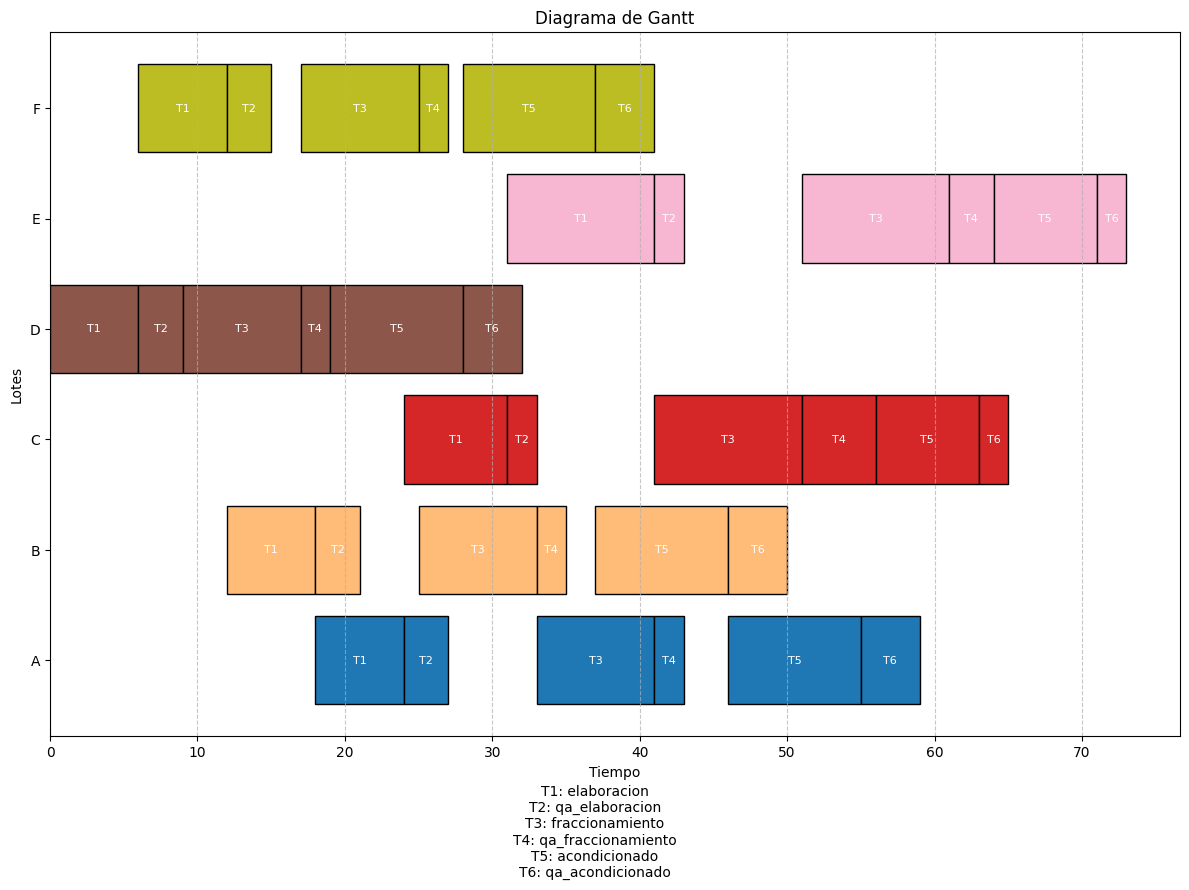

In [187]:
# plot the gantt chart
custom_scheduler.plot_gantt()

In [161]:
datos

,Lote,producto,elab,qa_elaboracion,fraccionamiento,qa_fraccionamiento,acondicionado,qa_acondicionado
0,A,IBU2,6,3,8,2,9,4
1,B,IBU2,6,3,8,2,9,4
2,C,PEN10,7,2,10,5,7,2
3,D,IBU2,6,3,8,2,9,4
4,E,AMO1,10,2,10,3,7,2
5,F,IBU2,6,3,8,2,9,4


### **Con el modelo SIN Overlap**

Creando scheduler para 6 lotes y 6 tareas.
Lotes ['A', 'B', 'C', 'D', 'E', 'F'] 
Duraciones {'elaboracion': [6, 6, 7, 6, 10, 6], 'qa_elaboracion': [3, 3, 2, 3, 2, 3], 'fraccionamiento': [8, 8, 10, 8, 10, 8], 'qa_fraccionamiento': [2, 2, 5, 2, 3, 2], 'acondicionado': [9, 9, 7, 9, 7, 9], 'qa_acondicionado': [4, 4, 2, 4, 2, 4]}
Tiempo mínimo necesario: 34.0 | Status: 4: OPTIMAL

Lote A:
  elaboracion: inicio=0, fin=6
  qa_elaboracion: inicio=6, fin=9
  fraccionamiento: inicio=9, fin=17
  qa_fraccionamiento: inicio=17, fin=19
  acondicionado: inicio=19, fin=28
  qa_acondicionado: inicio=28, fin=32

Lote B:
  elaboracion: inicio=0, fin=6
  qa_elaboracion: inicio=6, fin=9
  fraccionamiento: inicio=9, fin=17
  qa_fraccionamiento: inicio=17, fin=19
  acondicionado: inicio=19, fin=28
  qa_acondicionado: inicio=28, fin=32

Lote C:
  elaboracion: inicio=0, fin=7
  qa_elaboracion: inicio=7, fin=9
  fraccionamiento: inicio=9, fin=19
  qa_fraccionamiento: inicio=19, fin=24
  acondicionado: inicio=24

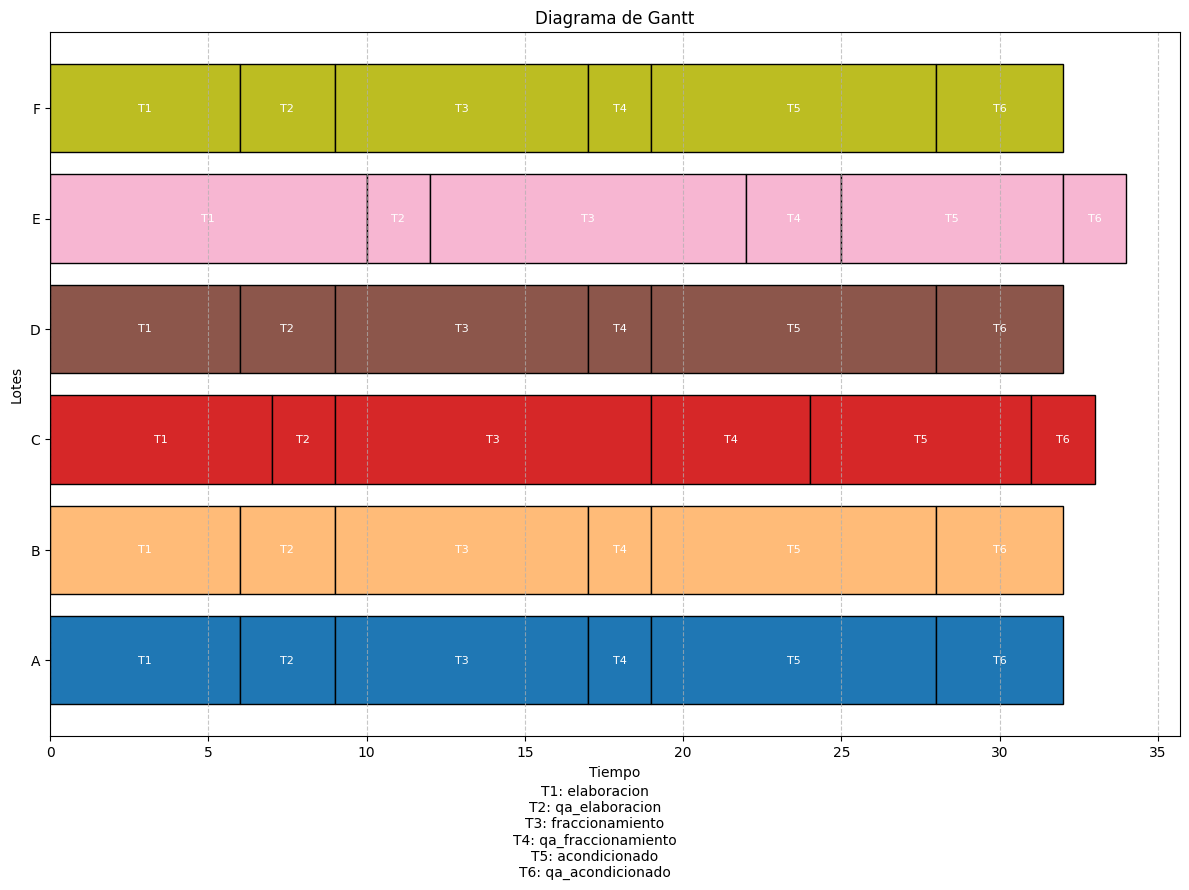

In [188]:
# define the custom sccheduler
custom_scheduler = Scheduler(
    lotes= datos['Lote'].values.tolist(),
    duraciones={
        'elaboracion': datos['elab'].values.tolist(),
        'qa_elaboracion': datos['qa_elaboracion'].values.tolist(),
        'fraccionamiento': datos['fraccionamiento'].values.tolist(),
        'qa_fraccionamiento': datos['qa_fraccionamiento'].values.tolist(),
        'acondicionado': datos['acondicionado'].values.tolist(),
        'qa_acondicionado': datos['qa_acondicionado'].values.tolist()
    },
    max_makespan=100,
    no_overlap=False
)

custom_scheduler.run()
